**Loading the IMDB dataset**

In [34]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [35]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

**Encoding the integer sequences via multi-hot encoding**

In [36]:
def vectorize(data, dimension=10000):
    
    results = np.zeros((len(data), dimension))
    
    for i, sequence in enumerate(data):
        
        for j in sequence:
            
            results[i, j] = 1.
    
    return results

In [37]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [38]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Train Validation Data Split**

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Further experiments

In [40]:
model = Sequential([
    Dense(16, activation="tanh"),
    Dense(16, activation="tanh"),
    Dense(16, activation="tanh"),
    Dense(1, activation="sigmoid")
])

In [41]:
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1582 - accuracy: 0.7928 - val_loss: 0.1050 - val_accuracy: 0.8759
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0773 - accuracy: 0.9097 - val_loss: 0.0852 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0508 - accuracy: 0.9377 - val_loss: 0.0918 - val_accuracy: 0.8743
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.9543 - val_loss: 0.0913 - val_accuracy: 0.8798
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0289 - accuracy: 0.9654 - val_loss: 0.0936 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0249 - accuracy: 0.9707 - val_loss: 0.0985 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0200 - accuracy: 0.9774 - val_loss: 0.1027 - val_accuracy: 0.8775
Epoch 8/20
30

In [42]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.8502


In [43]:
history_dict = history.history

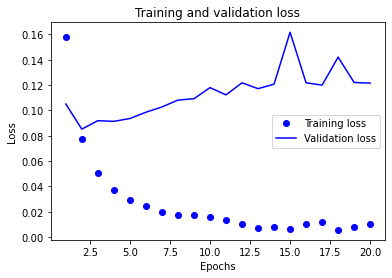

In [44]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

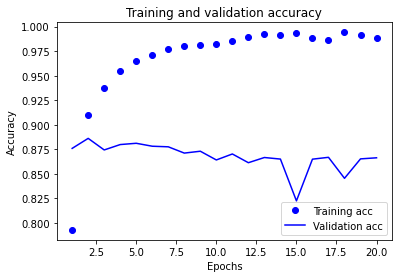

In [45]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()